## Classification and Regression Model
We are to build up classification and regressiong models.

### Classification
We would be writing code to perform prediction for a target variable 'LOYALTY GROUP'.
<br> The exploratory data analysis we carried out in the Data Exploration shows that the most important features regarding LOYALTY GROUP participation are Experience Score, Total Spent, Income and Age.

In [2]:
import pandas as pd
import numpy as np

In [3]:
customer_data = pd.read_csv('C:\\Users\\USER\\Documents\\python\\Customer Data Set - Student 1 of 3.csv')
product_data = pd.read_csv('C:\\Users\\USER\\Documents\\python\\Product Data Set - Student 2 of 3.csv', sep='|')
transaction_data= pd.read_csv('C:\\Users\\USER\\Documents\\python\\Transaction Data Set - Student 3 of 3.csv', sep='|')

## Changing Customer View

In [4]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace('$', ''))
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace(',', ''))

In [5]:
trans_product = transaction_data.merge(product_data, how='inner', left_on ='PRODUCT NUM', right_on = 'PRODUCT CODE')

In [6]:
trans_product['UNIT LIST PRICE'] = trans_product['UNIT LIST PRICE'].map(lambda x: float(x.replace('$', '')))

In [7]:
trans_product['Total Price'] = trans_product['QUANTITY PURCHASED'] * trans_product['UNIT LIST PRICE'] * (1 - trans_product['DISCOUNT TAKEN'])

In [8]:
customer_prod_categ = trans_product.groupby(['CUSTOMER NUM', 'PRODUCT CATEGORY']).agg({'Total Price': 'sum'})

In [9]:
customer_prod_categ = customer_prod_categ.reset_index()

In [10]:
customer_pivot = customer_prod_categ.pivot(index = 'CUSTOMER NUM', columns = 'PRODUCT CATEGORY', values= 'Total Price')


In [11]:
trans_total_spend = trans_product.groupby('CUSTOMER NUM').agg({'Total Price': 'sum'}).rename(columns= {'Total Price': 'TOTAL SPENT'})

In [12]:
customer_KPIs = customer_pivot.merge(trans_total_spend, how = 'inner', left_index = True, right_index= True)

In [13]:
customer_KPIs = customer_KPIs.fillna(0)

In [14]:
customer_all_view = customer_data.merge(customer_KPIs, how = 'inner', left_on = 'CUSTOMERID', right_index=True)


In [15]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512


# CLASSIFICATION

## Feature Selection
We are to perform prediction for the target variable LOYALTY GROUP, i.e we are to find the factors associated with the loyalty program participation to help predict in the future who is likely to participate or not.
The exploratoty data analysis ran earlier showed that the most important features regarding LOYALTY GROUP  participation are EXPERIENCE SCORE, TOTAL SPENT, INCOME and AGE.

We are to use the above mentioned features to create some classification models. However, we try out different models and varied combination of features and contrast their performance.

In [16]:
DF_classification = customer_all_view[['INCOME', 'AGE', 'EXPERIENCE SCORE', 'TOTAL SPENT', 'LOYALTY GROUP']]
DF_classification

,INCOME,AGE,EXPERIENCE SCORE,TOTAL SPENT,LOYALTY GROUP
0,133498,64,5,6826.770,enrolled
1,94475,42,9,5062.451,notenrolled
2,88610,40,9,8562.440,enrolled
3,84313,38,8,5522.694,enrolled
4,51498,30,3,213.512,notenrolled
...,...,...,...,...,...
495,113125,47,7,8501.464,enrolled
496,118108,49,7,9903.658,enrolled
497,97353,42,8,6251.466,enrolled
498,34424,22,1,20.010,notenrolled


In [17]:
target_feature = pd.DataFrame(DF_classification['LOYALTY GROUP'])
print(type(target_feature))
target_feature.head()

<class 'pandas.core.frame.DataFrame'>


,LOYALTY GROUP
0,enrolled
1,notenrolled
2,enrolled
3,enrolled
4,notenrolled


In [18]:
DF_classification = DF_classification.drop(['LOYALTY GROUP'], axis = 1)
DF_classification.head()

,INCOME,AGE,EXPERIENCE SCORE,TOTAL SPENT
0,133498,64,5,6826.770
1,94475,42,9,5062.451
2,88610,40,9,8562.440
3,84313,38,8,5522.694
4,51498,30,3,213.512


In [19]:
from sklearn import preprocessing

In [20]:
DF_classification_column_names = DF_classification.columns.values
DF_classification_column_names

array(['INCOME', 'AGE', 'EXPERIENCE SCORE', 'TOTAL SPENT'], dtype=object)

The code below changes the scale of all data in the dataset to a scale of 0-1 range. We seperated the column head because the code will change our dataset to a numpy array and it would loose its column head.

In [21]:
DF_classification = preprocessing.minmax_scale(DF_classification)

In [22]:
DF_classification

array([[0.8728178 , 0.63888889, 0.44444444, 0.44653193],
       [0.57204628, 0.33333333, 0.88888889, 0.33079041],
       [0.52684153, 0.30555556, 0.88888889, 0.56039405],
       ...,
       [0.59422859, 0.33333333, 0.77777778, 0.40879128],
       [0.1092005 , 0.05555556, 0.        , 0.        ],
       [0.4228205 , 0.22222222, 0.88888889, 0.27303383]])

In [23]:
DF_classification = pd.DataFrame(DF_classification, columns = DF_classification_column_names)
DF_classification.head()

,INCOME,AGE,EXPERIENCE SCORE,TOTAL SPENT
0,0.872818,0.638889,0.444444,0.446532
1,0.572046,0.333333,0.888889,0.330790
2,0.526842,0.305556,0.888889,0.560394
3,0.493722,0.277778,0.777778,0.360983
4,0.240799,0.166667,0.222222,0.012694


In [24]:
DF_classification = pd.concat([DF_classification, target_feature], axis = 1)
DF_classification

,INCOME,AGE,EXPERIENCE SCORE,TOTAL SPENT,LOYALTY GROUP
0,0.872818,0.638889,0.444444,0.446532,enrolled
1,0.572046,0.333333,0.888889,0.330790,notenrolled
2,0.526842,0.305556,0.888889,0.560394,enrolled
3,0.493722,0.277778,0.777778,0.360983,enrolled
4,0.240799,0.166667,0.222222,0.012694,notenrolled
...,...,...,...,...,...
495,0.715792,0.402778,0.666667,0.556394,enrolled
496,0.754199,0.430556,0.666667,0.648380,enrolled
497,0.594229,0.333333,0.777778,0.408791,enrolled
498,0.109200,0.055556,0.000000,0.000000,notenrolled


## Partitioning input data into training and testing splits

In [25]:
#the code below imports the train test split library
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(DF_classification[['EXPERIENCE SCORE', 'TOTAL SPENT', 'INCOME']], DF_classification['LOYALTY GROUP'], test_size = 0.2, random_state = 42)

AGE was remove from above because it is highly correlated with INCOME. We verified the relationship between AGE and INCOME in the Data Exploration project

## Training and Testing the Model
we train and test the model using KNN and decision tree algorithms

### Training a K-Nearest Neighbor Classifier

In [28]:
#we import the KNN lib
from sklearn.neighbors import KNeighborsClassifier

In [29]:
clf_KNN = KNeighborsClassifier(n_neighbors =8)
clf_KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [30]:
#the code trains the KNN clasifier, we use the fit fn
clf_KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [31]:
type(X_train)

pandas.core.frame.DataFrame

In [32]:
#to test the model, we use it to predict the labels of the testing feature
predicted = clf_KNN.predict(X_test)

In [33]:
type(predicted)

numpy.ndarray

Next we compare the predicted values to the actual values of the testing target labels

In [34]:
from sklearn import metrics

In [35]:
acc = metrics.accuracy_score(Y_test, predicted)
print('accuracy = '+str(acc*100)+'%')
print(metrics.classification_report(Y_test, predicted))

accuracy = 79.0%
              precision    recall  f1-score   support

    enrolled       0.73      0.92      0.82        51
 notenrolled       0.89      0.65      0.75        49

    accuracy                           0.79       100
   macro avg       0.81      0.79      0.79       100
weighted avg       0.81      0.79      0.79       100



## Training a Decision Trees Classifier

In [36]:
#we import the decision tree algorithm lib
from sklearn.tree import DecisionTreeClassifier

In [37]:
#we create an instance of the algorithm
clf_Tree = DecisionTreeClassifier(criterion = 'entropy', random_state =0)
clf_Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
clf_Tree.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [39]:
predicted = clf_Tree.predict(X_test)

In [40]:
acc = metrics.accuracy_score(Y_test, predicted)

In [41]:
print('accuracy = '+str(acc*100)+'%')
print(metrics.classification_report(Y_test, predicted))

accuracy = 75.0%
              precision    recall  f1-score   support

    enrolled       0.74      0.78      0.76        51
 notenrolled       0.76      0.71      0.74        49

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



From what we have, the accuracy of the decision tree model is less than that of the KNN model. However, do not rule out decision tree model yet until you have tested both models with different splits and then compare both models performance.

In [42]:
#we use the below code to get the most important factors that affect loyalty program
#this only works with decision tree model
clf_Tree.feature_importances_

array([0.26796289, 0.39545388, 0.33658323])

We fed the features to the model ealier in the following order DF_classification[['EXPERIENCE SCORE', 'TOTAL SPENT', 'INCOME']]
So, the order of importance of features (i.e from highest value to lowest value in the array output above) is as follows:
- TOTAL SPENT
- INCOME
- EXPERIENCE

## Training and Testing the Model Using K-fold Cross-Validation

In [43]:
from sklearn.model_selection import KFold

In [44]:
#we define a training and testing function
def Training_Testing_Accuracy_Only(model, train_data, train_labels, test_data, test_labels):
    model.fit(train_data, train_labels)
    predicted= model.predict(test_data)
    acc = metrics.accuracy_score(test_labels, predicted)
    print('accuracy ='+str(acc*100)+'%')
    return(acc)


In [45]:
#the code below sets the number of folds, i.e k=10
kf = KFold(n_splits =10)

## Training and Testing The Decision Tree Model by Using 10-fold Cross-Validation

In [46]:
#first we declare a new decision Tree classifier
#we declear an empty list to store accuracy in each iteration
clf_Tree = DecisionTreeClassifier(criterion = 'entropy')
accuracy_list =[]

In [47]:
#we train and test the decision tree model for each fold using a for loop to iterate over the folds
for train_index, test_index in kf.split(DF_classification[['EXPERIENCE SCORE', 'TOTAL SPENT', 'INCOME']]):
    X = DF_classification[['EXPERIENCE SCORE', 'TOTAL SPENT', 'INCOME']]
    Y = DF_classification['LOYALTY GROUP']
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    accuracy = Training_Testing_Accuracy_Only(clf_Tree, X_train, Y_train, X_test, Y_test)
    accuracy_list.append(accuracy)
    
print('overall accuracy is',100*sum(accuracy_list)/len(accuracy_list),'%')

accuracy =78.0%
accuracy =74.0%
accuracy =72.0%
accuracy =70.0%
accuracy =72.0%
accuracy =84.0%
accuracy =70.0%
accuracy =72.0%
accuracy =74.0%
accuracy =78.0%
overall accuracy is 74.4 %


## Training and Testing the K-Nearest Neighbor Classifier with a 10-fold Cross-Validation and Finding the Optimum K-Neighbors

In [48]:
#declare an empty list o store the accuracy for each iteration of K-neighbors
accuracy_list_for_each_K_neighbors =[]

In [49]:
#train and test the KNN classifier by using two for loops
#the outer loop iterate over the vaules of k-neighbor
#the inner loop is for training and testing the model
for k_neighbors in range(1,15):
    clf_NN = KNeighborsClassifier(n_neighbors =k_neighbors)
    accuracy_list_k_fold = []
    for train_index, test_index in kf.split(DF_classification[['EXPERIENCE SCORE', 'TOTAL SPENT', 'INCOME']]):
        X = DF_classification[['EXPERIENCE SCORE', 'TOTAL SPENT', 'INCOME']]
        Y = DF_classification['LOYALTY GROUP']
        X_test, X_train = X.iloc[test_index], X.iloc[train_index]
        Y_test, Y_train = Y.iloc[test_index], Y.iloc[train_index]
        accuracy = Training_Testing_Accuracy_Only(clf_NN, X_train, Y_train, X_test, Y_test)
        accuracy_list_k_fold.append(accuracy)
    accuracy_list_for_each_K_neighbors.append(100* sum(accuracy_list_k_fold)/len(accuracy_list_k_fold))
    print('overall accuracy for k_neighbors =', k_neighbors, 'is', accuracy_list_for_each_K_neighbors[k_neighbors-1])
    


accuracy =64.0%
accuracy =64.0%
accuracy =66.0%
accuracy =64.0%
accuracy =82.0%
accuracy =68.0%
accuracy =70.0%
accuracy =64.0%
accuracy =76.0%
accuracy =68.0%
overall accuracy for k_neighbors = 1 is 68.6
accuracy =74.0%
accuracy =60.0%
accuracy =72.0%
accuracy =74.0%
accuracy =74.0%
accuracy =78.0%
accuracy =70.0%
accuracy =72.0%
accuracy =82.0%
accuracy =76.0%
overall accuracy for k_neighbors = 2 is 73.2
accuracy =72.0%
accuracy =64.0%
accuracy =68.0%
accuracy =70.0%
accuracy =78.0%
accuracy =78.0%
accuracy =70.0%
accuracy =70.0%
accuracy =76.0%
accuracy =76.0%
overall accuracy for k_neighbors = 3 is 72.20000000000002
accuracy =82.0%
accuracy =66.0%
accuracy =72.0%
accuracy =74.0%
accuracy =80.0%
accuracy =82.0%
accuracy =70.0%
accuracy =76.0%
accuracy =78.0%
accuracy =78.0%
overall accuracy for k_neighbors = 4 is 75.80000000000001
accuracy =78.0%
accuracy =64.0%
accuracy =80.0%
accuracy =74.0%
accuracy =80.0%
accuracy =76.0%
accuracy =74.0%
accuracy =72.0%
accuracy =72.0%
accuracy =

In [50]:
import matplotlib.pyplot  as plt

We can identify the optimum value of K from plotting the accuracy list

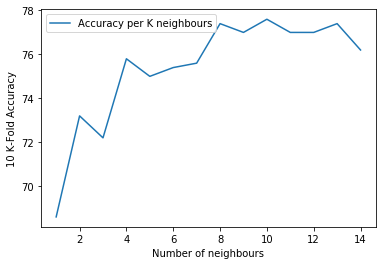

In [51]:
plt.plot(range(1,15), accuracy_list_for_each_K_neighbors)
plt.legend(['Accuracy per K neighbours'], loc='upper left')
plt.xlabel('Number of neighbours')
plt.ylabel('10 K-Fold Accuracy')
plt.show()

From the graph above, the highest value of K is 10.

# LINEAR REGRESSION
We would build up a model that predicts the Total Spending a customer using Gender,	Age, Income, Experience Score, Loyalty Group, Household Size and Marital Status.

In [62]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512


The GENDER, AGE, INCOME, EXPERIENCE SCORE, LOYALTY GROUP, HOUSEHOLD SIZE AND MARITAL STATUS would be used by the regression model to train and test the machine to predict the TOTAL SPENDING of a customer.

In [98]:
DF_input = customer_all_view[['GENDER', 'AGE', 'INCOME', 'EXPERIENCE SCORE', 'LOYALTY GROUP', 'HOUSEHOLD SIZE', 'MARITAL STATUS']]
DF_input.head()

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS
0,0,64,133498,5,enrolled,4,Single
1,0,42,94475,9,notenrolled,6,Married
2,0,40,88610,9,enrolled,5,Married
3,0,38,84313,8,enrolled,1,Single
4,0,30,51498,3,notenrolled,1,Single


Loyalty Group and Marital Status are strings and therefore have to be converted to numeric format  because regression model libraries accept features that are in numeric format only.

In [99]:
DF_input['MARITAL STATUS'].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

The MARITAL STATUS column has four unique values, next step is to create a one hot encoding (which converts categorical variable to numerical form) by using the "get_dummies" method

In [100]:
pd.get_dummies(DF_input['MARITAL STATUS']).head(10)

,Divorced,Married,Single,Widow/Widower
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0
8,0,1,0,0
9,0,1,0,0


In [101]:
#we define a fn that encodes the LOYALTY GROUP column since it has just two values
def encode_loyalty(value):
    if value == 'enrolled':
        return 1
    else:
        return 0
    

In [102]:
DF_input['LOYALTY GROUP'] = DF_input['LOYALTY GROUP'].apply(encode_loyalty)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
DF_input.head(10)

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS
0,0,64,133498,5,1,4,Single
1,0,42,94475,9,0,6,Married
2,0,40,88610,9,1,5,Married
3,0,38,84313,8,1,1,Single
4,0,30,51498,3,0,1,Single
5,1,63,132893,1,0,4,Married
6,0,33,65002,9,1,4,Married
7,0,49,115672,9,1,6,Single
8,0,44,101741,9,1,3,Married
9,0,36,76994,2,0,2,Married


In [108]:
DF_input['INCOME'].describe()

count        500
unique       498
top       112035
freq           2
Name: INCOME, dtype: object

We have to convert INCOME from object to int

In [110]:
DF_input['INCOME'] = DF_input['INCOME'].map(lambda x: int(x))

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
DF_input = pd.get_dummies(DF_input)

In [113]:
DF_input.head()

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,MARITAL STATUS_Widow/Widower
0,0,64,133498,5,1,4,0,0,1,0
1,0,42,94475,9,0,6,0,1,0,0
2,0,40,88610,9,1,5,0,1,0,0
3,0,38,84313,8,1,1,0,0,1,0
4,0,30,51498,3,0,1,0,0,1,0


Next, we scale the features of DF_input to the 0-1 range because every input variable has it own scale

In [114]:
from sklearn import preprocessing
DF_input_column_names = DF_input.columns.values


In [116]:
DF_input_np = preprocessing.minmax_scale(DF_input)
DF_input_np

array([[0.        , 0.63888889, 0.8728178 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 0.57204628, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.30555556, 0.52684153, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.33333333, 0.59422859, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.05555556, 0.1092005 , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.22222222, 0.4228205 , ..., 0.        , 0.        ,
        0.        ]])

In [117]:
Reg_input_scale = pd.DataFrame(DF_input_np, columns = DF_input_column_names)
Reg_input_scale.head()

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,MARITAL STATUS_Widow/Widower
0,0.0,0.638889,0.872818,0.444444,1.0,0.6,0.0,0.0,1.0,0.0
1,0.0,0.333333,0.572046,0.888889,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.305556,0.526842,0.888889,1.0,0.8,0.0,1.0,0.0,0.0
3,0.0,0.277778,0.493722,0.777778,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.166667,0.240799,0.222222,0.0,0.0,0.0,0.0,1.0,0.0


All the values are between the 0-1 range. A train - test spilt of 80% to 20% respectively is created by running the code below

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Reg_input_scale, customer_all_view['TOTAL SPENT'], test_size = 0.2, random_state = 42)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
regr= LinearRegression()

In [122]:
#the code below is used to train the model
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
#the code below is used to predict the values of the total spending
pred = regr.predict(X_test)

In [124]:
#the code below is used to get the regression coefficients of thr linear model
print('Regression coefficients: \n', regr.coef_)

Regression coefficients: 
 [   35.58494877 -7076.18001534 12403.0952701    505.84578936
  1566.48092344  1040.19923196   377.33573376   -82.02665324
   -34.57620088  -260.73287964]


The coeffients are in the same order that the variables were fed to the model. The code below shows the order

In [127]:
Reg_input_scale.columns.values

array(['GENDER', 'AGE', 'INCOME', 'EXPERIENCE SCORE', 'LOYALTY GROUP',
       'HOUSEHOLD SIZE', 'MARITAL STATUS_Divorced',
       'MARITAL STATUS_Married', 'MARITAL STATUS_Single',
       'MARITAL STATUS_Widow/Widower'], dtype=object)

Positive coefficients means that as the predictor increases, so does the total spending. Negative coefficients means that as the predictor increases, the total spending decreases. The code below creates a table showing the above infomation.

In [147]:
col = ['Predicted Variable']
Reg_coef_table = pd.DataFrame(Reg_input_scale.columns.values, columns = col)
Reg_coef_table['Coeffient'] = pd.DataFrame(regr.coef_)

Reg_coef_table

,Predicted Variable,Coeffient
0,GENDER,35.584949
1,AGE,-7076.180015
2,INCOME,12403.095270
3,EXPERIENCE SCORE,505.845789
4,LOYALTY GROUP,1566.480923
5,HOUSEHOLD SIZE,1040.199232
6,MARITAL STATUS_Divorced,377.335734
7,MARITAL STATUS_Married,-82.026653
8,MARITAL STATUS_Single,-34.576201
9,MARITAL STATUS_Widow/Widower,-260.732880


In [156]:
rel_total = []
for value in Reg_coef_table['Coeffient']:
    value = str(value)
    if '-' in value:
        rel_total.append('Negative')
    else:
        rel_total.append('Positive')
        
Reg_coef_table['Relationship With Total Spend'] = pd.DataFrame(rel_total)
Reg_coef_table

,Predicted Variable,Coeffient,Relationship with Total Spend,Relationship With Total Spent,Relationship With Total Spend
0,GENDER,35.584949,Negative,Positive,Positive
1,AGE,-7076.180015,Negative,Negative,Negative
2,INCOME,12403.095270,Negative,Positive,Positive
3,EXPERIENCE SCORE,505.845789,Negative,Positive,Positive
4,LOYALTY GROUP,1566.480923,Negative,Positive,Positive
5,HOUSEHOLD SIZE,1040.199232,Negative,Positive,Positive
6,MARITAL STATUS_Divorced,377.335734,Negative,Positive,Positive
7,MARITAL STATUS_Married,-82.026653,Negative,Negative,Negative
8,MARITAL STATUS_Single,-34.576201,Negative,Negative,Negative
9,MARITAL STATUS_Widow/Widower,-260.732880,Negative,Negative,Negative


Next we evaluate the performance of our model by using the mean squared error

In [160]:
from sklearn.metrics import mean_squared_error
import math
print('Mean error= %.2f' %math.sqrt(mean_squared_error(Y_test, pred)))

Mean error= 1778.79


This result means the linear model predicts Total Spending with an average error of $1779